|      Course      |            Combinatorial Algorithms           |
| :--------------: | :-------------------------------------------: |
|   **Semester**   |                **2024 Winter**                |
|  **Assignment**  |                    **01**                     |
|    **Group**     |                    **03**                     |
| **Member 01**    |           **999014681 Mingshan, LI**          |
| **Member 02**    |           **999014772 Shunxi, XIAO**          |
| **Member 03**    |           **999022064 Weizhi, LU**            |

# Q2. TSP: Branch and Bound and Approximation

1. Implement in Python the branch and bound and the approximation algorithms for the traveling
salesman problem. 

2. Provide test cases to ensure the correctness of your programs. 

3. Report on the comparison of the running times of the backtracking with bounding, the branch and bound, and the approximation implementations.

## Part 01: Test Cases Generator

Thanks to the course materials, we already have the implementation of TSP bounding algorithm. We can therefore make the use of `tsp_bounding` to generate the correct solutions of randomly generated test cases.

In [1]:
from math import inf, isinf
from tsp_bounding import tsp_bounding
import random

def tsp_generate_test_cases(fname: str, tests_num: int, init: int, step: int, maxDist: int, conRate: float) -> None:
    '''
    Generate valid test cases for TSP problem that must guarentee the triangular inequality.

    Arguments:
        - fname:     the name of file that stores all the test cases
        - tests_num: the number of test cases to generate
        - init:      the initial value of nodes number
        - step:      the step nodes number is increased each loop
        - maxDist:   the maximun distance between nodes
        - conRate:   the posibility rate of connection between two nodes, range from 0 to 1
    '''

    assert 0 < conRate and conRate < 1 and f"Error: conRate = {conRate} is invalid, conRate is in (0, 1)."

    file = open(fname, 'w')

    count = 1
    nodes_num = init

    while count <= tests_num:

        '''
        Step 1: Generate an empty graph
        '''
     
        graph = valid_graph(nodes_num, maxDist, conRate)

        if not is_connected(graph):

            continue

        '''
        Step 4: Generate a TSP solution to the graph
        '''

        sol = tsp_bounding(graph)

        if len(sol) != nodes_num:

            continue

        # for row in graph: print(row)
        # print(f'sol: {sol}')
        sol_ = ' '.join(map(str, sol))

        '''
        Step 5: Print graph and sol into file {fname}
        '''
        
        test_case = ''
        
        for i in range(nodes_num):
            
            row = ' '.join(map(str, graph[i]))
            test_case += row + '#'

        test_case += sol_
        
        print(test_case)
        
        if count != tests_num:
            test_case += '\n'

        file.write(test_case)

        count += 1
        nodes_num += step

    file.close()


def valid_graph(nodes_num: int, maxDist: int, conRate: float) -> list[list]:
    '''
    Generate a valid graph that satisfies triangle inequality.
    Arguments:
        - nodes_num: number of nodes
        - maxDist:   maximum value of edge distance
        - conRate:   possibility rate of the connection between two nodes
    '''
    
    graph = []

    for r in range(nodes_num):
        row = [0] * nodes_num
        row[r] = inf
        graph.append( row )
    
    def set_edges(currNode, vistedNodes) -> None:

        nonlocal graph

        if currNode == nodes_num - 1:

            return

        nodesLeft = [ node for node in range(currNode+1, nodes_num) ]

        for newNode in nodesLeft:

            randInt = random.randint(1, 100)
            connInt = int(conRate * 100)

            newEdge = inf # new edge between currNode and newNode

            # 1. Decide whether newNode and currNode is connnected
            if randInt <= connInt:
                
                # 2. Set the distance of newEdge according to triangle inequelity
                if len(vistedNodes) != 0:
 
                    # Found the bound of newEdge
                    
                    maxBound = maxDist
                    minBound = 1

                    for vNode in vistedNodes:

                        edge1 = graph[vNode][newNode]
                        edge2 = graph[vNode][currNode]
                        
                        if not isinf(edge1) and not isinf(edge2):
                        
                            newMaxBound = edge1 + edge2 - 1
                            newMinBound = abs(edge1 - edge2) + 1
                        
                            if newMaxBound < maxBound: maxBound = newMaxBound
                            if newMinBound > minBound: minBound = newMinBound

                    # set new edge between currNode and newNode

                    if minBound < maxBound:

                        newEdge = random.randint(minBound, min(maxDist, maxBound))

                    elif minBound == maxBound:

                        newEdge = min(maxDist, maxBound)

                    # if minBound > maxBound, then currNode and newNode cannot be connected.

                else:

                    newEdge = random.randint(1, maxDist)

            graph[currNode][newNode] = newEdge
            graph[newNode][currNode] = newEdge

        set_edges( currNode + 1, vistedNodes + [currNode] )
    
    set_edges(0, [])

    return graph


def is_connected(graph) -> bool:
    """
    Check whether the graph is connected.
    """
    n = len(graph)
    visited = [False] * n
    # print(visited)

    def is_connected_recursive(node):
    
        visited[node] = True

        # print(visited)

        for neighbor in range(n):
            
            if graph[node][neighbor] != inf and not visited[neighbor]:

                is_connected_recursive(neighbor)

    is_connected_recursive(0)

    return all(visited)

We can then run the following code snippet to generate test cases.

In [2]:
fname = 'tsp_test_cases'
num = 8
init = 6
step = 1
maxDist = 20
conRate = 0.35
print('All generated tests:')
tsp_generate_test_cases(fname, num, init, step, maxDist, conRate)

All generated tests:
inf 8 16 8 13 inf#8 inf inf 6 18 8#16 inf inf inf inf 14#8 6 inf inf inf 7#13 18 inf inf inf inf#inf 8 14 7 inf inf#0 2 5 3 1 4
inf inf 5 12 inf inf 12#inf inf inf 15 inf 4 inf#5 inf inf 13 6 11 inf#12 15 13 inf inf 15 inf#inf inf 6 inf inf inf 18#inf 4 11 15 inf inf 13#12 inf inf inf 18 13 inf#0 2 4 6 5 1 3
inf inf 11 inf inf inf inf 10#inf inf 12 inf 12 11 inf inf#11 12 inf inf inf 12 inf inf#inf inf inf inf 4 inf inf 11#inf 12 inf 4 inf 20 6 10#inf 11 12 inf 20 inf 18 13#inf inf inf inf 6 18 inf inf#10 inf inf 11 10 13 inf inf#0 2 1 5 6 4 3 7
inf 13 inf 7 7 inf inf 10 9#13 inf 2 inf inf inf 8 inf inf#inf 2 inf 14 inf inf 8 inf inf#7 inf 14 inf 11 inf 11 inf inf#7 inf inf 11 inf 12 5 13 inf#inf inf inf inf 12 inf 11 inf 14#inf 8 8 11 5 11 inf inf 4#10 inf inf inf 13 inf inf inf 9#9 inf inf inf inf 14 4 9 inf#0 3 2 1 6 4 5 8 7
inf inf 4 inf 4 13 inf inf inf inf#inf inf 13 inf inf inf 8 4 inf 5#4 13 inf inf inf 12 inf 12 inf 17#inf inf inf inf 4 3 inf 12 inf inf#4 

## Part 02: Branch and Bound

First, we implement the brach and bound strategy of TSP problem.

Starting with the distance function which calculates the total distance of a given path in the graph.

In [3]:
def distance(path, graph):
    """
    The distance of {path} in {graph}
    """

    size = len(graph)
    length = len(path)

    result = 0 if length < size else graph[path[-1]][0]

    for i in range(length-1):

        result += graph[path[i]][path[i+1]]
        # if not isinf(graph[path[i]][path[i+1]]):
        #     result += graph[path[i]][path[i+1]]
        # else:
        #     continue

    return result

The function iscycle checks if the given path forms a Hamiltonian cycle in the provided graph.
And a Hamiltonian cycle is a cycle that visits each node exactly once and returns to the starting node.

In [4]:
def iscycle(path, graph):
    """
    Is {path} a Hamiltonian cycle in {graph}?
    """

    size = len(graph)
    result = set(path) == set(range(size)) # is it a permutation?

    if result:

        result = path[0] == 0 # does it start at 0?
        
        for i in range(size):

            if not result:
                break

            result = not isinf(graph[path[i]][path[(i+1)%size]]) # is there an edge?

    return result

The functio nmincost calculates the estimated minimum cost of completing a given path in the graph.It can be used as cost bound used in the implement of branch and bound algorithm.

In [5]:
def mincost(path, graph):
    """
    The MinCostBound function
    """
    size = len(graph)
    result = distance(path, graph)

    if len(path) != size:

        for i in (set(range(size))-set(path[:-1])):
            result += min(graph[i]);

    return result

The function sort_tries sorts a list of possible next nodes 'tries' based on their estimated cost of extending the current 'path' in the given 'graph'. The sorting uses function 'mincost' to prioritize nodes that lead to lower overall cost paths.

In [6]:
def sort_tries(graph, tries, path, bound=mincost):
    """
    Sort possible next nodes based on estimated cost.
    """
    return sorted(tries, key=lambda x: bound(path + [x], graph))

The following is the completement of the branch an bound algorithm which solves the Traveling Salesman Problem (TSP) using a backtracking algorithm with branch and bound.### Function Introduction:

Key Features:
1. **Parameters**:
   - graph: An adjacency matrix representing the graph where edge weights indicate distances.
   - path: A list of visited nodes forming the current partial path (default starts at node 0).
   - shortest: The current shortest cycle cost (initialized to infinity).
   - bound: A bound function (mincost) that estimates the lower bound cost of completing a path.
2. **Logic**:
   - Checks if the current path forms a valid cycle (by iscycle function). If valid, the path is returned.
   - Feasible next nodes 'tries are determined by checking if adding a node keeps the estimated cost below the current shortest cost.
   - The feasible nodes are sorted using a function 'sort_tries' to prioritize promising paths.
   - Each candidate path is explored recursively, updating the shortest path and cost if a better solution is found.
3. **Output**:
   - Returns the shortest cycle found during the search.

In [7]:
def tsp_branchAndBound(graph: list, path=[0], shortest=inf, bound=mincost) -> list:
    """
    Solve TSP using backtracking with branch and bound.
    """
    size = len(graph)
    result = path if iscycle(path, graph) else []  # If path is a valid cycle, return it

    tries = []  # List to store possible next nodes

    # Add all feasible targets to tries
    for target in (set(range(size)) - set(path)):

        if bound(path + [target], graph) < shortest:
            tries.append(target)

    sort_tries(graph, tries, path)  # Sort tries (no return value used here)

    # Explore each try recursively
    for i in range(len(tries)):

        tour, cost = [], inf

        if bound(path + [tries[i]], graph) < shortest:
            tour = tsp_branchAndBound(graph, path + [tries[i]], shortest)
            cost = distance(tour, graph)

            if tour and cost < shortest:  # Update shortest tour if a better one is found
                shortest = cost
                result = tour

    return result

## Part 03: Approximation Algorithm

Next, we implement the approximation strategy of TSP problem.

The function check_undirected checks if a given graph (represented as an adjacency matrix) is undirected. An undirected graph has symmetric adjacency, meaning the value at $graph[i][j]$ must be equal to the value at $graph[j][i]$ for all pairs of indices i and j.

In [8]:
def check_undirected(graph: list):
    """
    Checks if a given graph is undirected.
    """
    for i in range(len(graph)):
        for j in range(len(graph)):
            if graph[i][j] != graph[j][i]:
                return False
    return True

The function satisfies_trangle_inequality verifies whether a graph (represented as an adjacency matrix) satisfies the triangle inequality. The triangle inequality states that for any three distinct nodes i, j, and k in the graph, the direct path between i and k should not be longer than the sum of the paths through an intermediate node j

i.e. $$graph[i][k] \leq graph[i][j] + graph[j][k]$$

The function skips unreachable paths (represented by infinite values).

In [9]:
def satisfies_triangle_inequality(graph):
    """
    Checks if the given graph satisfies the triangle inequality.
    """
    n = len(graph)

    for i in range(n):
        for j in range(n):
            for k in range(n):
                if i != j and j != k and i != k:  # Ensure three distinct nodes
                    if graph[i][j] == inf or graph[j][k] == inf or graph[i][k] == inf:
                        continue  # Skip unreachable paths
                    if graph[i][k] > graph[i][j] + graph[j][k]:  # Check inequality
                        return False
    return True

The function min_spanning_tree constructs a Minimum Spanning Tree (MST) for the input undirected graph, represented as an adjacency matrix, using a greedy algorithm (similar to Prim's algorithm) in the following steps: 
1. **Input Validation**: It first checks if the graph is undirected using the check_undirected function. If not, a 'ValueError' will be raised.
2. **Initialization**: The MST is initialized as an empty adjacency matrix (result), and the algorithm starts with the first node in the MST set T.
3. **Edge Selection**: The algorithm repeatedly identifies the minimum-weight edge that connects a node in the MST set T to a node not yet in the set.
4. **Output**: The resulting adjacency matrix (result) represents the MST of the input graph.

This function ensures that all nodes are connected with the minimum total edge weight while maintaining the properties of a spanning tree.

In [10]:
# def min_spanning_tree(graph: list) -> list:
#     """
#     Constructs a minimum spanning tree (MST) of the given graph using a greedy algorithm.
#     """
#     if not check_undirected(graph):
#         raise ValueError("The input graph is not undirected!")

#     n = len(graph)
#     result = [[inf for _ in range(n)] for _ in range(n)]  # Initialize MST matrix
#     T = [0]  # Start from the first node (arbitrarily chosen)

#     # Iterate until all nodes are included in the MST
#     while set(T) != set(range(n)):
#         i, j = -1, -1
#         min_weight = inf
#         # Find the minimum weight edge connecting the MST set (T) to the remaining nodes
#         for s in T:
#             for t in (set(range(n)) - set(T)):
#                 if graph[s][t] < min_weight:
#                     min_weight = graph[s][t]
#                     i, j = s, t
#         # Add the edge to the MST
#         result[i][j], result[j][i] = graph[i][j], graph[j][i]
#         T.append(j)  # Add the new node to the MST set

#     return result

def min_spanning_tree(graph: list[list]) -> list[list]:
    """
    Constructs a minimum spanning tree (MST) of the given graph using a greedy algorithm.
    """
    
    N = len(graph)    
    MST_nodes = set()
    MST_nodes.add(0)
    neighbours_edges = set()
    remaining_nodes = set(range(N))
    MST = [[inf for col in range(N)] for row in range(N)]  # Initialize MST matrix

    while len(remaining_nodes) != 0:
        
        remaining_nodes -= MST_nodes
        neighbours_edges.clear()

        # 1. Find neighbour edges
        for node in MST_nodes:
            for rNode in remaining_nodes:
                if not isinf(graph[node][rNode]):
                    neighbours_edges.add( (node, rNode) )
        
        # 2. Find the shortes neighbour edge
        minEdge = (0, 0)
        minEdge_dist = inf
        minEdge_node1 = -1
        minEdge_node2 = -1
        for currEdge in neighbours_edges:
            currNode1 = currEdge[0]
            currNode2 = currEdge[1]
            currEdge_dist = graph[currNode1][currNode2]
            if currEdge_dist < minEdge_dist:
                minEdge       = currEdge
                minEdge_dist  = currEdge_dist
                minEdge_node1 = currNode1
                minEdge_node2 = currNode2

        # 3. Add new node in MST
        if minEdge_node2 not in MST_nodes:
            MST_nodes.add(minEdge_node2)
            remaining_nodes.remove(minEdge_node2)
        else:
            MST_nodes.add(minEdge_node1)
            remaining_nodes.remove(minEdge_node1)

        MST[minEdge_node1][minEdge_node2] = minEdge_dist
        MST[minEdge_node2][minEdge_node1] = minEdge_dist

    return MST


The function `depth_first_search` performs a depth-first traversal of a tree represented as an adjacency matrix. It starts at a specified node (default is the first node, 0) and explores as far as possible along each branch before backtracking.

Key features:
1. **Recursive Traversal**: The function uses recursion to explore all unvisited neighbors of the current node.
2. **Parameters**:
   - tree: An adjacency matrix where edges are represented by weights, and 'float('inf')' indicates no direct connection.
   - path: A list that tracks the traversal path, initialized with the starting node (0 by default).
3. **Traversal Logic**: For each neighbor of the current node, if the node is unvisited and an edge exists, the function recurses into that neighbor.
4. **Output**: Returns a list result containing the nodes visited in depth-first order.

This function is useful for exploring tree-like structures systematically.

In [11]:
def depth_first_search(tree: list, path=[0]):
    """
    Performs a depth-first traversal on the given tree.
    """
    n = len(tree)
    result = path
    s = path[-1]  # Current node

    # Explore all unvisited neighbors of the current node
    for t in (set(range(n)) - set(path)):
        if t not in path and not isinf(tree[s][t]):  # Check if edge exists
            result.append(t)
            result = depth_first_search(tree, result)
    
    return result

The function remove_duplicate_nodes removes duplicate nodes from a given traversal path while preserving the original order of the nodes.

**Logic**: 
   - Iterates through the 'path' and maintains a list 'seen' of nodes that have already been added to the result.
   - If a node is not in 'seen', it is appended to the result 'tsp_path' and marked as seen.
   
**Output**: Returns a list 'tsp_path' containing each node from the input path exactly once, in the order of their first appearance.

In [12]:
def remove_duplicate_nodes(path):
    """
    Removes duplicate nodes from a given path while maintaining the order.
    """
    tsp_path, seen = [], []  # Initialize the resulting path and a list to track seen nodes

    for node in path:
        # If the node hasn't been seen before, add it to the result and mark it as seen
        if node not in seen:
            tsp_path.append(node)
            seen.append(node)
    
    return tsp_path

The following is the completement of the approximation algorithm who provides an approximate solution to the Traveling Salesman Problem (TSP) for a graph represented as an adjacency matrix. It utilizes the Minimum Spanning Tree (MST)-based approach to generate a near-optimal TSP path.

Key steps:
1. **Input Validation**: The function ensures the graph satisfies the triangle inequality. If not, a 'ValueError' is raised.
2. **Construct MST**: It computes the Minimum Spanning Tree (MST) of the graph using the 'min_spanning_tree' function.
3. **Depth-First Traversal**: Performs a depth-first traversal of the MST using the 'depth_first_search' function to generate a traversal path.
4. **TSP Path Construction**: Removes duplicate nodes from the traversal path to produce a valid TSP route, typically ensuring all nodes are visited once.
5. **Output**: Returns a list 'tsp_path' representing the approximate solution to the TSP. This approach is efficient and provides a reasonable solution, especially when the triangle inequality is satisfied.

In [13]:
def tsp_approximation(graph: list):
    """
    Approximates a solution to the Traveling Salesman Problem (TSP) using a minimum spanning tree (MST).
    """
    if not satisfies_triangle_inequality(graph):
        raise ValueError("The input matrix does not satisfy the triangle inequality!")

    # 1. Construct the minimum spanning tree
    tree = min_spanning_tree(graph)

    # 2. Perform a depth-first traversal
    traversal_path = depth_first_search(tree)

    # 3. Remove duplicate nodes to create a valid TSP path
    tsp_path = remove_duplicate_nodes(traversal_path)

    return tsp_path

## Part 04: Comparison of Running Time

Finally, we make a comparison of running times of three algorithms implemented above.
- general
- bounding
- branch and bound
- approximation

To begin with, it is necessary for us to implement a test case builder.

In [14]:
def build_tests(fname: list) -> list:
    '''
    Return a list consisting of all test cases in file {fname}.
    '''

    file  = open(fname, "r")
    lines = file.read().split("\n")
    file.close()

    tests = []

    for line in lines:

        test = line.split("#")

        nodes_num = len(test) - 1
        
        graph = []
        sol = list(map(int, test[nodes_num].split()))
        
        
        for i in range(nodes_num):
            
            row = []
            currRow = list(test[i].split(' '))

            for i in range(nodes_num):

                currEdge = currRow[i]

                if currEdge == 'inf': row.append(inf)
                else: row.append( int(currEdge) )

            graph.append( row )

        tests += [(graph,sol)]
    
    return tests

After that, We implement the following function to make a comparison of all variants of TSP backtracking algorithms.

Moreover, to better visualize the comparision, we can use matplot to draw a graph that shows the running times of these algorithms.

In [15]:
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def compare_tsp_algos( fname: str, algos: list, names: list, if_plt: bool) -> None:

    count = 0
    tests = build_tests( fname )
    nodes_numbers = []
    running_times = []
    approx_ratios = []

    for test in tests:

        graph, sol = test
        nodes_num = len(graph)
        
        print('------------------ ' + f'Test No.{count+1}' + ' ------------------\n')
        print(f'graph: ')
        for row in graph: 
            print(f'       {row}')
        print(f'\nsolution: {sol}\n\n')

        nodes_numbers.append( nodes_num )
        case_running_times = []

        for i in range( len(algos) ):

            startT   = time.process_time()
            sol_algo = algos[i]( graph )
            endT     = time.process_time()
            elapT    = endT - startT

            case_running_times.append( elapT )

            minDist      = distance(sol, graph)
            minDist_algo = distance(sol_algo, graph)
            correctness  = True if minDist == minDist_algo else False

            if  names[i] != 'TSP-Approximation': # TSP algorithms

                print(
                    f'algorithm:    {names[i]}',
                    f'correctness:  {correctness}',
                    f'runningTime:  {elapT:.10f}',
                    f'distance:     {distance(sol_algo, graph)}',
                    sep = '\n',
                    end = '\n\n'                
                )
            
            else: # TSP Approximation
                
                if minDist_algo == 0:
                    ratio = -1.0
                else:   
                    ratio = float(minDist) / float(minDist_algo)
                
                approx_ratios.append(ratio)

                print(
                    f'algorithm:    {names[i]}',
                    f'runningTime:  {elapT:.10f}',
                    f'distance:     {distance(sol_algo, graph)}',
                    f'ratio:        {ratio}',
                    sep = '\n',
                    end = '\n\n'                
                )
        
        running_times.append( case_running_times )
        count += 1


    if if_plt:

        N = len(algos)
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Running Times
        ax1.set_xlabel('Graph Size')
        ax1.set_ylabel('Running Time (seconds)')
        running_times = list(zip(*running_times))  # Transpose for easier plotting
        for i in range(N - 1):
            ax1.plot(nodes_numbers, running_times[i], label=names[i], marker='o')
        ax1.grid(True)
        ax1.legend(loc="upper left")
        
        # Approximation
        ax2 = ax1.twinx()
        ax2.set_ylabel('Ratio of (Solution distance / Approximated distance)')
        plt.plot(nodes_numbers, approx_ratios, label=names[N-1], marker='o', linestyle='--', color='grey')
        ax2.legend(loc='upper center')
        ax2.set_ylim(-7,5)

        # Show graph
        plt.title('Running Time Comparison of TSP Algorithms')
        plt.tight_layout()
        plt.show()        

Finally, we excecute the following code snippet to finish.

------------------ Test No.1 ------------------

graph: 
       [inf, 8, 16, 8, 13, inf]
       [8, inf, inf, 6, 18, 8]
       [16, inf, inf, inf, inf, 14]
       [8, 6, inf, inf, inf, 7]
       [13, 18, inf, inf, inf, inf]
       [inf, 8, 14, 7, inf, inf]

solution: [0, 2, 5, 3, 1, 4]


algorithm:    TSP-General
correctness:  True
runningTime:  0.0000990000
distance:     74

algorithm:    TSP-Bounding
correctness:  True
runningTime:  0.0000870000
distance:     74

algorithm:    TSP-Brand-and-Bound
correctness:  True
runningTime:  0.0003230000
distance:     74

algorithm:    TSP-Approximation
runningTime:  0.0000860000
distance:     inf
ratio:        0.0

------------------ Test No.2 ------------------

graph: 
       [inf, inf, 5, 12, inf, inf, 12]
       [inf, inf, inf, 15, inf, 4, inf]
       [5, inf, inf, 13, 6, 11, inf]
       [12, 15, 13, inf, inf, 15, inf]
       [inf, inf, 6, inf, inf, inf, 18]
       [inf, 4, 11, 15, inf, inf, 13]
       [12, inf, inf, inf, 18, 13, inf]

solut

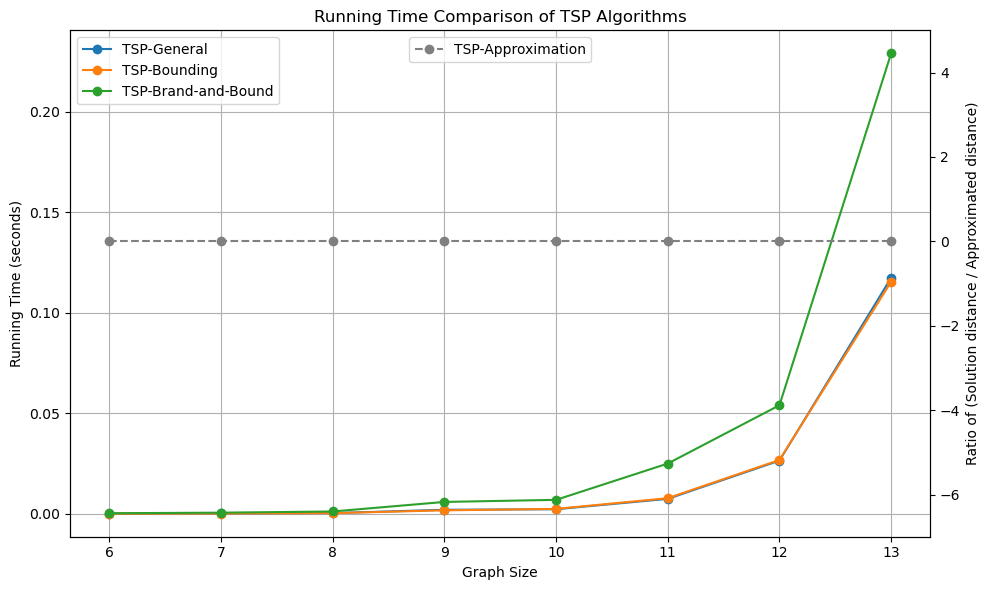

In [16]:
from tsp_bounding import tsp_bounding
from tsp_general import tsp_general

algos = [
    tsp_general,
    tsp_bounding,
    tsp_branchAndBound,
    tsp_approximation
]

algoNames = [
    'TSP-General',
    'TSP-Bounding',
    'TSP-Brand-and-Bound',
    'TSP-Approximation'
]

testFile = 'tsp_test_cases'

compare_tsp_algos(testFile, algos, algoNames, True)